# Importing necessary libraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.linear_model import RidgeClassifier

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,precision_score,accuracy_score

# Reading the Data

In [16]:
df = pd.read_csv("/home/coea/akhil-test/Churn_Prediction.csv")

In [17]:
print(df)

      RowNumber  CustomerId         Surname  CreditScore Geography  Gender  \
0             1    15634602        Hargrave          619    France  Female   
1             2    15647311            Hill          608     Spain  Female   
2             3    15619304            Onio          502    France  Female   
3             4    15701354            Boni          699    France  Female   
4             5    15737888        Mitchell          850     Spain  Female   
5             6    15574012             Chu          645     Spain    Male   
6             7    15592531        Bartlett          822    France    Male   
7             8    15656148          Obinna          376   Germany  Female   
8             9    15792365              He          501    France    Male   
9            10    15592389              H?          684    France    Male   
10           11    15767821          Bearce          528    France    Male   
11           12    15737173         Andrews          497     Spa

# Checking for Missing values

In [18]:
df.isnull().values.any()

False

# Checking Data Types

In [19]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Plotting the various Comparisions

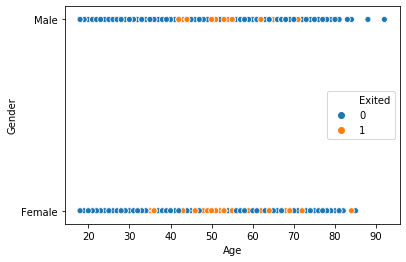

In [22]:
sns.scatterplot(data=df,x='Age',y='Gender',hue='Exited')

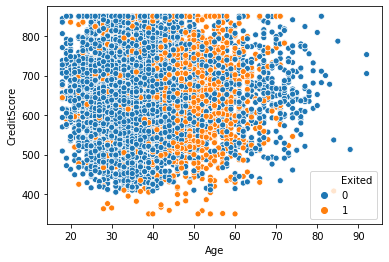

In [23]:
sns.scatterplot(data=df,x='Age',y='CreditScore',hue='Exited')

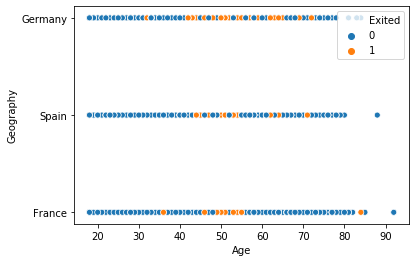

In [24]:
sns.scatterplot(data=df,x='Age',y='Geography',hue='Exited')

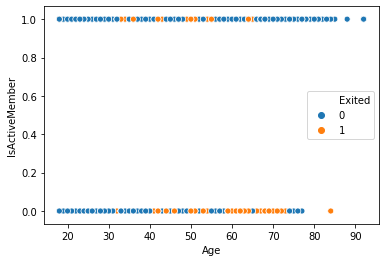

In [25]:
sns.scatterplot(data=df,x='Age',y='IsActiveMember',hue='Exited')

# Dropping Unwanted Columns

In [26]:
df1=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [27]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Converting Catergorical Variables into Numerical

In [28]:
df1=pd.get_dummies(data=df1,drop_first=True)

# Dividing the Dependent and Independent Variables

In [97]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']

In [30]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [31]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Splitting into Train and Test

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=35)

# Standardization

In [33]:
scaler= MinMaxScaler()

In [34]:
X_train_scaled=scaler.fit_transform(X_train)

In [35]:
X_test_scaled= scaler.fit_transform(X_test)

# Model Building and Evaluation

# 1. Logistic Regression

In [36]:
lr = LogisticRegression()

In [37]:
lr_model=lr.fit(X_train_scaled,y_train)

In [38]:
y_pred_logr=lr_model.predict(X_test_scaled)

In [39]:
cm = confusion_matrix(y_test,y_pred_logr)
cm

array([[1554,   46],
       [ 319,   81]])

In [40]:
accuracy_score(y_test,y_pred_logr)

0.8175

In [41]:
f1_score(y_test,y_pred_logr)

0.3074003795066414

In [42]:
classification_report(y_test,y_pred_logr)

'              precision    recall  f1-score   support\n\n           0       0.83      0.97      0.89      1600\n           1       0.64      0.20      0.31       400\n\n    accuracy                           0.82      2000\n   macro avg       0.73      0.59      0.60      2000\nweighted avg       0.79      0.82      0.78      2000\n'

# 2. Random Forest Classifier

In [43]:
rfc = RandomForestClassifier()

In [44]:
rfc_model = rfc.fit(X_train_scaled,y_train)

In [45]:
y_pred_rfc = rfc_model.predict(X_test_scaled)

In [46]:
accuracy_score(y_test,y_pred_rfc)

0.849

In [47]:
classification_report(y_test,y_pred_rfc)

'              precision    recall  f1-score   support\n\n           0       0.87      0.96      0.91      1600\n           1       0.71      0.42      0.53       400\n\n    accuracy                           0.85      2000\n   macro avg       0.79      0.69      0.72      2000\nweighted avg       0.84      0.85      0.83      2000\n'

# Improving the Model

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}

In [50]:
forest = RandomForestClassifier()

In [51]:
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1)

In [52]:
clf_model= clf.fit(X_train_scaled,y_train)

In [53]:
y_pred_clf= clf_model.predict(X_test_scaled)

In [54]:
confusion_matrix(y_test,y_pred_clf)

array([[1544,   56],
       [ 227,  173]])

In [55]:
accuracy_score(y_test,y_pred_clf)

0.8585

In [56]:
clf.best_params_

{'max_depth': 15, 'n_estimators': 250}

# 3.KNeighbours Classifier

In [57]:
knc = KNeighborsClassifier()

In [58]:
knc_model = knc.fit(X_train_scaled,y_train)

In [59]:
y_pred_knc=knc_model.predict(X_test_scaled)

In [60]:
confusion_matrix(y_test,y_pred_knc)

array([[1512,   88],
       [ 288,  112]])

In [61]:
accuracy_score(y_test,y_pred_knc)

0.812

In [62]:
f1_score(y_pred_knc,y_test)

0.37333333333333335

In [63]:
classification_report(y_pred_knc,y_test)

'              precision    recall  f1-score   support\n\n           0       0.94      0.84      0.89      1800\n           1       0.28      0.56      0.37       200\n\n    accuracy                           0.81      2000\n   macro avg       0.61      0.70      0.63      2000\nweighted avg       0.88      0.81      0.84      2000\n'

# 4.SVC

In [64]:
sv_classifier = SVC()

In [65]:
svc_model = sv_classifier.fit(X_train_scaled,y_train)

In [66]:
y_pred_svc = svc_model.predict(X_test_scaled)

In [67]:
confusion_matrix(y_test,y_pred_svc)

array([[1600,    0],
       [ 399,    1]])

In [68]:
accuracy_score(y_pred_svc,y_test)

0.8005

In [69]:
f1_score(y_pred_svc,y_test)

0.004987531172069826

In [70]:
classification_report(y_pred_svc,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.80      0.89      1999\n           1       0.00      1.00      0.00         1\n\n    accuracy                           0.80      2000\n   macro avg       0.50      0.90      0.45      2000\nweighted avg       1.00      0.80      0.89      2000\n'

# 5. Naive Bayes Classifier

In [71]:
nbc = GaussianNB()

In [72]:
nbc_model = nbc.fit(X_train_scaled,y_train)

In [73]:
y_pred_nbc = nbc_model.predict(X_test_scaled)

In [74]:
confusion_matrix(y_pred_nbc,y_test)

array([[1520,  256],
       [  80,  144]])

In [75]:
accuracy_score(y_test,y_pred_nbc)

0.832

In [76]:
f1_score(y_test,y_pred_nbc)

0.4615384615384615

In [77]:
classification_report(y_test,y_pred_nbc)

'              precision    recall  f1-score   support\n\n           0       0.86      0.95      0.90      1600\n           1       0.64      0.36      0.46       400\n\n    accuracy                           0.83      2000\n   macro avg       0.75      0.66      0.68      2000\nweighted avg       0.81      0.83      0.81      2000\n'

# 6. Decision Tree Classifier

In [78]:
dtc = DecisionTreeClassifier()

In [79]:
dtc_model = dtc.fit(X_train_scaled,y_train)

In [80]:
y_pred_dtc = dtc_model.predict(X_test_scaled)

In [81]:
confusion_matrix(y_test,y_pred_dtc)

array([[1362,  238],
       [ 209,  191]])

In [82]:
accuracy_score(y_test,y_pred_dtc)

0.7765

In [83]:
classification_report(y_test,y_pred_dtc)

'              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86      1600\n           1       0.45      0.48      0.46       400\n\n    accuracy                           0.78      2000\n   macro avg       0.66      0.66      0.66      2000\nweighted avg       0.78      0.78      0.78      2000\n'

In [84]:
dtc_model.score(X_test_scaled,y_test)

0.7765

In [85]:
f1_score(y_pred_dtc,y_test)

0.4607961399276237

#  7.Ridge Classifier

In [86]:
rc = RidgeClassifier()

In [87]:
rc_model= rc.fit(X_train_scaled,y_train)

In [88]:
y_pred_rc = rc_model.predict(X_test_scaled)

In [89]:
confusion_matrix(y_test,y_pred_rc)

array([[1572,   28],
       [ 351,   49]])

In [90]:
accuracy_score(y_test,y_pred_rc)

0.8105

In [91]:
f1_score(y_test,y_pred_rc)

0.20545073375262057

## H2O

In [92]:
import h2o
from h2o.automl import H2OAutoML

In [93]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 .

/home/scypyuser/anaconda3/lib/python3.7/site-packages/h2o/backend/connection.py:370: UserWarning: Proxy is defined in the environment: http_proxy. This may interfere with your H2O Connection.
  "This may interfere with your H2O Connection." % name)


.... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /home/scypyuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_chgn4_8
  JVM stdout: /tmp/tmp_chgn4_8/h2o_scypyuser_started_from_python.out
  JVM stderr: /tmp/tmp_chgn4_8/h2o_scypyuser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_scypyuser_mh9rfg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.940 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [94]:
data = h2o.import_file("/home/coea/akhil-test/Churn_Prediction.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [99]:
data.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [104]:
data['Exited'] = data['Exited'].asfactor()

In [117]:
data.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


In [115]:
X1=data.drop('Exited',axis=1)
y1=data['Exited']

In [122]:
y1.dtype

dtype('<U')

In [125]:
x2= X1.columns
y2 = "Exited"

In [126]:
aml = H2OAutoML(max_models=20, seed=1)

In [127]:
aml.train(x=x2, y=y2, training_frame=data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211105_124301

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06186345336810438
RMSE: 0.24872364859036702
LogLoss: 0.21719080100356136
Null degrees of freedom: 9999
Residual degrees of freedom: 9987
Null deviance: 10109.782546523538
Residual deviance: 4343.816020071227
AIC: 4369.816020071227
AUC: 0.9637482351950427
AUCPR: 0.8934594603014412
Gini: 0.9274964703900854

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34982927915577244: 


,,0,1,Error,Rate
0,0,7520.0,443.0,0.0556,(443.0/7963.0)
1,1,383.0,1654.0,0.188,(383.0/2037.0)
2,Total,7903.0,2097.0,0.0826,(826.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349829,0.800194,197.0
1,max f2,0.216994,0.850226,249.0
2,max f0point5,0.557217,0.836311,130.0
3,max accuracy,0.453490,0.920300,163.0
4,max precision,0.996837,1.000000,0.0
5,max recall,0.036551,1.000000,366.0
6,max specificity,0.996837,1.000000,0.0
7,max absolute_mcc,0.392466,0.749040,182.0
8,max min_per_class_accuracy,0.244927,0.892489,236.0
9,max mean_per_class_accuracy,0.216994,0.896983,249.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 21.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.980575,4.909180,4.909180,1.000,0.989601,1.000000,0.989601,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.963331,4.909180,4.909180,1.000,0.971917,1.000000,0.980759,0.049092,0.098184,390.918017,390.918017,0.098184
2,3,0.03,0.948221,4.909180,4.909180,1.000,0.954966,1.000000,0.972161,0.049092,0.147275,390.918017,390.918017,0.147275
3,4,0.04,0.924964,4.909180,4.909180,1.000,0.937466,1.000000,0.963488,0.049092,0.196367,390.918017,390.918017,0.196367
4,5,0.05,0.902159,4.909180,4.909180,1.000,0.912851,1.000000,0.953360,0.049092,0.245459,390.918017,390.918017,0.245459
5,6,0.10,0.714947,4.585174,4.747177,0.934,0.813200,0.967000,0.883280,0.229259,0.474718,358.517428,374.717722,0.470574
6,7,0.15,0.518993,3.681885,4.392080,0.750,0.608423,0.894667,0.791661,0.184094,0.658812,268.188513,339.207986,0.638970
7,8,0.20,0.370796,2.611684,3.946981,0.532,0.439736,0.804000,0.703680,0.130584,0.789396,161.168385,294.698085,0.740168
8,9,0.30,0.204852,1.404026,3.099329,0.286,0.275417,0.631333,0.560926,0.140403,0.929799,40.402553,209.932908,0.790906
9,10,0.40,0.129056,0.446735,2.436181,0.091,0.162114,0.496250,0.461223,0.044674,0.974472,-55.326460,143.618066,0.721427




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10049967995695354
RMSE: 0.3170168449104141
LogLoss: 0.3304789759703236
Null degrees of freedom: 9999
Residual degrees of freedom: 9988
Null deviance: 10111.452082324347
Residual deviance: 6609.579519406472
AIC: 6633.579519406472
AUC: 0.8681846285757934
AUCPR: 0.7100837359742688
Gini: 0.7363692571515867

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2934192066988317: 


,,0,1,Error,Rate
0,0,7081.0,882.0,0.1108,(882.0/7963.0)
1,1,689.0,1348.0,0.3382,(689.0/2037.0)
2,Total,7770.0,2230.0,0.1571,(1571.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293419,0.631826,217.0
1,max f2,0.141224,0.703926,292.0
2,max f0point5,0.571229,0.694759,122.0
3,max accuracy,0.474950,0.866800,151.0
4,max precision,0.994800,1.000000,0.0
5,max recall,0.008229,1.000000,399.0
6,max specificity,0.994800,1.000000,0.0
7,max absolute_mcc,0.474950,0.549700,151.0
8,max min_per_class_accuracy,0.176627,0.787141,273.0
9,max mean_per_class_accuracy,0.178686,0.787857,272.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.969276,4.909180,4.909180,1.000,0.983804,1.000000,0.983804,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.940695,4.663721,4.786451,0.950,0.954179,0.975000,0.968991,0.046637,0.095729,366.372116,378.645066,0.095101
2,3,0.03,0.912031,4.810997,4.794633,0.980,0.927381,0.976667,0.955121,0.048110,0.143839,381.099656,379.463263,0.142960
3,4,0.04,0.875463,4.270987,4.663721,0.870,0.895629,0.950000,0.940248,0.042710,0.186549,327.098675,366.372116,0.184037
4,5,0.05,0.841629,4.221895,4.575356,0.860,0.859922,0.932000,0.924183,0.042219,0.228768,322.189494,357.535592,0.224498
5,6,0.10,0.626996,3.593520,4.084438,0.732,0.734433,0.832000,0.829308,0.179676,0.408444,259.351988,308.443790,0.387346
6,7,0.15,0.441583,2.493864,3.554246,0.508,0.531984,0.724000,0.730200,0.124693,0.533137,149.386352,255.424644,0.481147
7,8,0.20,0.330370,1.737850,3.100147,0.354,0.384203,0.631500,0.643701,0.086892,0.620029,73.784978,210.014728,0.527476
8,9,0.30,0.200259,1.345115,2.515137,0.274,0.257245,0.512333,0.514882,0.134512,0.754541,34.511537,151.513664,0.570816
9,10,0.40,0.132434,0.805106,2.087629,0.164,0.163684,0.425250,0.427082,0.080511,0.835052,-19.489445,108.762887,0.546341


In [128]:
lb = aml.leaderboard

In [129]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_4_AutoML_1_20211105_124301,0.868185,0.330479,0.710084,0.224502,0.317017,0.1005
StackedEnsemble_AllModels_7_AutoML_1_20211105_124301,0.867607,0.330943,0.709602,0.21832,0.317205,0.100619
StackedEnsemble_BestOfFamily_8_AutoML_1_20211105_124301,0.867558,0.331195,0.708722,0.215934,0.317516,0.100816
StackedEnsemble_BestOfFamily_4_AutoML_1_20211105_124301,0.86753,0.331482,0.70784,0.218948,0.317622,0.100884
StackedEnsemble_BestOfFamily_5_AutoML_1_20211105_124301,0.867245,0.331489,0.708289,0.220067,0.317643,0.100897
StackedEnsemble_AllModels_3_AutoML_1_20211105_124301,0.867215,0.331493,0.708714,0.220364,0.317363,0.100719
StackedEnsemble_AllModels_2_AutoML_1_20211105_124301,0.866592,0.332371,0.707251,0.228047,0.31793,0.10108
StackedEnsemble_BestOfFamily_3_AutoML_1_20211105_124301,0.866394,0.332452,0.707167,0.221323,0.317994,0.10112
GBM_grid_1_AutoML_1_20211105_124301_model_2,0.866043,0.333969,0.705405,0.233716,0.318416,0.101389
StackedEnsemble_AllModels_1_AutoML_1_20211105_124301,0.865224,0.334366,0.704404,0.223441,0.31879,0.101627


In [133]:
preds = aml.predict(data)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [140]:
preds.head()

predict,p0,p1
1,0.522929,0.477071
0,0.830421,0.169579
1,0.0194297,0.98057
0,0.935482,0.0645182
0,0.933139,0.0668612
1,0.564071,0.435929
0,0.955151,0.0448495
1,0.00929933,0.990701
0,0.919702,0.0802977
0,0.983225,0.0167748


In [134]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")

In [135]:
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_4_AutoML_1_20211105_124301,0.868185,0.330479,0.710084,0.224502,0.317017,0.1005,1899,0.111063,StackedEnsemble
StackedEnsemble_AllModels_7_AutoML_1_20211105_124301,0.867607,0.330943,0.709602,0.21832,0.317205,0.100619,7829,0.113122,StackedEnsemble
StackedEnsemble_BestOfFamily_8_AutoML_1_20211105_124301,0.867558,0.331195,0.708722,0.215934,0.317516,0.100816,4125,0.05718,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20211105_124301,0.86753,0.331482,0.70784,0.218948,0.317622,0.100884,412,0.014711,StackedEnsemble
StackedEnsemble_BestOfFamily_5_AutoML_1_20211105_124301,0.867245,0.331489,0.708289,0.220067,0.317643,0.100897,745,0.054068,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20211105_124301,0.867215,0.331493,0.708714,0.220364,0.317363,0.100719,738,0.024922,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20211105_124301,0.866592,0.332371,0.707251,0.228047,0.31793,0.10108,422,0.024141,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20211105_124301,0.866394,0.332452,0.707167,0.221323,0.317994,0.10112,367,0.014826,StackedEnsemble
GBM_grid_1_AutoML_1_20211105_124301_model_2,0.866043,0.333969,0.705405,0.233716,0.318416,0.101389,310,0.003925,GBM
StackedEnsemble_AllModels_1_AutoML_1_20211105_124301,0.865224,0.334366,0.704404,0.223441,0.31879,0.101627,333,0.009696,StackedEnsemble


In [143]:
# Get the best model using the metric
m = aml.leader
# this is equivalent to
m = aml.get_best_model()
m

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211105_124301

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06186345336810438
RMSE: 0.24872364859036702
LogLoss: 0.21719080100356136
Null degrees of freedom: 9999
Residual degrees of freedom: 9987
Null deviance: 10109.782546523538
Residual deviance: 4343.816020071227
AIC: 4369.816020071227
AUC: 0.9637482351950427
AUCPR: 0.8934594603014412
Gini: 0.9274964703900854

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34982927915577244: 


,,0,1,Error,Rate
0,0,7520.0,443.0,0.0556,(443.0/7963.0)
1,1,383.0,1654.0,0.188,(383.0/2037.0)
2,Total,7903.0,2097.0,0.0826,(826.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349829,0.800194,197.0
1,max f2,0.216994,0.850226,249.0
2,max f0point5,0.557217,0.836311,130.0
3,max accuracy,0.453490,0.920300,163.0
4,max precision,0.996837,1.000000,0.0
5,max recall,0.036551,1.000000,366.0
6,max specificity,0.996837,1.000000,0.0
7,max absolute_mcc,0.392466,0.749040,182.0
8,max min_per_class_accuracy,0.244927,0.892489,236.0
9,max mean_per_class_accuracy,0.216994,0.896983,249.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 21.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.980575,4.909180,4.909180,1.000,0.989601,1.000000,0.989601,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.963331,4.909180,4.909180,1.000,0.971917,1.000000,0.980759,0.049092,0.098184,390.918017,390.918017,0.098184
2,3,0.03,0.948221,4.909180,4.909180,1.000,0.954966,1.000000,0.972161,0.049092,0.147275,390.918017,390.918017,0.147275
3,4,0.04,0.924964,4.909180,4.909180,1.000,0.937466,1.000000,0.963488,0.049092,0.196367,390.918017,390.918017,0.196367
4,5,0.05,0.902159,4.909180,4.909180,1.000,0.912851,1.000000,0.953360,0.049092,0.245459,390.918017,390.918017,0.245459
5,6,0.10,0.714947,4.585174,4.747177,0.934,0.813200,0.967000,0.883280,0.229259,0.474718,358.517428,374.717722,0.470574
6,7,0.15,0.518993,3.681885,4.392080,0.750,0.608423,0.894667,0.791661,0.184094,0.658812,268.188513,339.207986,0.638970
7,8,0.20,0.370796,2.611684,3.946981,0.532,0.439736,0.804000,0.703680,0.130584,0.789396,161.168385,294.698085,0.740168
8,9,0.30,0.204852,1.404026,3.099329,0.286,0.275417,0.631333,0.560926,0.140403,0.929799,40.402553,209.932908,0.790906
9,10,0.40,0.129056,0.446735,2.436181,0.091,0.162114,0.496250,0.461223,0.044674,0.974472,-55.326460,143.618066,0.721427




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10049967995695354
RMSE: 0.3170168449104141
LogLoss: 0.3304789759703236
Null degrees of freedom: 9999
Residual degrees of freedom: 9988
Null deviance: 10111.452082324347
Residual deviance: 6609.579519406472
AIC: 6633.579519406472
AUC: 0.8681846285757934
AUCPR: 0.7100837359742688
Gini: 0.7363692571515867

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2934192066988317: 


,,0,1,Error,Rate
0,0,7081.0,882.0,0.1108,(882.0/7963.0)
1,1,689.0,1348.0,0.3382,(689.0/2037.0)
2,Total,7770.0,2230.0,0.1571,(1571.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293419,0.631826,217.0
1,max f2,0.141224,0.703926,292.0
2,max f0point5,0.571229,0.694759,122.0
3,max accuracy,0.474950,0.866800,151.0
4,max precision,0.994800,1.000000,0.0
5,max recall,0.008229,1.000000,399.0
6,max specificity,0.994800,1.000000,0.0
7,max absolute_mcc,0.474950,0.549700,151.0
8,max min_per_class_accuracy,0.176627,0.787141,273.0
9,max mean_per_class_accuracy,0.178686,0.787857,272.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.969276,4.909180,4.909180,1.000,0.983804,1.000000,0.983804,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.940695,4.663721,4.786451,0.950,0.954179,0.975000,0.968991,0.046637,0.095729,366.372116,378.645066,0.095101
2,3,0.03,0.912031,4.810997,4.794633,0.980,0.927381,0.976667,0.955121,0.048110,0.143839,381.099656,379.463263,0.142960
3,4,0.04,0.875463,4.270987,4.663721,0.870,0.895629,0.950000,0.940248,0.042710,0.186549,327.098675,366.372116,0.184037
4,5,0.05,0.841629,4.221895,4.575356,0.860,0.859922,0.932000,0.924183,0.042219,0.228768,322.189494,357.535592,0.224498
5,6,0.10,0.626996,3.593520,4.084438,0.732,0.734433,0.832000,0.829308,0.179676,0.408444,259.351988,308.443790,0.387346
6,7,0.15,0.441583,2.493864,3.554246,0.508,0.531984,0.724000,0.730200,0.124693,0.533137,149.386352,255.424644,0.481147
7,8,0.20,0.330370,1.737850,3.100147,0.354,0.384203,0.631500,0.643701,0.086892,0.620029,73.784978,210.014728,0.527476
8,9,0.30,0.200259,1.345115,2.515137,0.274,0.257245,0.512333,0.514882,0.134512,0.754541,34.511537,151.513664,0.570816
9,10,0.40,0.132434,0.805106,2.087629,0.164,0.163684,0.425250,0.427082,0.080511,0.835052,-19.489445,108.762887,0.546341


In [144]:
# Get the best model using a non-default metric
m = aml.get_best_model(criterion="logloss")
m

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_4_AutoML_1_20211105_124301

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06186345336810438
RMSE: 0.24872364859036702
LogLoss: 0.21719080100356136
Null degrees of freedom: 9999
Residual degrees of freedom: 9987
Null deviance: 10109.782546523538
Residual deviance: 4343.816020071227
AIC: 4369.816020071227
AUC: 0.9637482351950427
AUCPR: 0.8934594603014412
Gini: 0.9274964703900854

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.34982927915577244: 


,,0,1,Error,Rate
0,0,7520.0,443.0,0.0556,(443.0/7963.0)
1,1,383.0,1654.0,0.188,(383.0/2037.0)
2,Total,7903.0,2097.0,0.0826,(826.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.349829,0.800194,197.0
1,max f2,0.216994,0.850226,249.0
2,max f0point5,0.557217,0.836311,130.0
3,max accuracy,0.453490,0.920300,163.0
4,max precision,0.996837,1.000000,0.0
5,max recall,0.036551,1.000000,366.0
6,max specificity,0.996837,1.000000,0.0
7,max absolute_mcc,0.392466,0.749040,182.0
8,max min_per_class_accuracy,0.244927,0.892489,236.0
9,max mean_per_class_accuracy,0.216994,0.896983,249.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 21.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.980575,4.909180,4.909180,1.000,0.989601,1.000000,0.989601,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.963331,4.909180,4.909180,1.000,0.971917,1.000000,0.980759,0.049092,0.098184,390.918017,390.918017,0.098184
2,3,0.03,0.948221,4.909180,4.909180,1.000,0.954966,1.000000,0.972161,0.049092,0.147275,390.918017,390.918017,0.147275
3,4,0.04,0.924964,4.909180,4.909180,1.000,0.937466,1.000000,0.963488,0.049092,0.196367,390.918017,390.918017,0.196367
4,5,0.05,0.902159,4.909180,4.909180,1.000,0.912851,1.000000,0.953360,0.049092,0.245459,390.918017,390.918017,0.245459
5,6,0.10,0.714947,4.585174,4.747177,0.934,0.813200,0.967000,0.883280,0.229259,0.474718,358.517428,374.717722,0.470574
6,7,0.15,0.518993,3.681885,4.392080,0.750,0.608423,0.894667,0.791661,0.184094,0.658812,268.188513,339.207986,0.638970
7,8,0.20,0.370796,2.611684,3.946981,0.532,0.439736,0.804000,0.703680,0.130584,0.789396,161.168385,294.698085,0.740168
8,9,0.30,0.204852,1.404026,3.099329,0.286,0.275417,0.631333,0.560926,0.140403,0.929799,40.402553,209.932908,0.790906
9,10,0.40,0.129056,0.446735,2.436181,0.091,0.162114,0.496250,0.461223,0.044674,0.974472,-55.326460,143.618066,0.721427




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10049967995695354
RMSE: 0.3170168449104141
LogLoss: 0.3304789759703236
Null degrees of freedom: 9999
Residual degrees of freedom: 9988
Null deviance: 10111.452082324347
Residual deviance: 6609.579519406472
AIC: 6633.579519406472
AUC: 0.8681846285757934
AUCPR: 0.7100837359742688
Gini: 0.7363692571515867

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2934192066988317: 


,,0,1,Error,Rate
0,0,7081.0,882.0,0.1108,(882.0/7963.0)
1,1,689.0,1348.0,0.3382,(689.0/2037.0)
2,Total,7770.0,2230.0,0.1571,(1571.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.293419,0.631826,217.0
1,max f2,0.141224,0.703926,292.0
2,max f0point5,0.571229,0.694759,122.0
3,max accuracy,0.474950,0.866800,151.0
4,max precision,0.994800,1.000000,0.0
5,max recall,0.008229,1.000000,399.0
6,max specificity,0.994800,1.000000,0.0
7,max absolute_mcc,0.474950,0.549700,151.0
8,max min_per_class_accuracy,0.176627,0.787141,273.0
9,max mean_per_class_accuracy,0.178686,0.787857,272.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.36 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.969276,4.909180,4.909180,1.000,0.983804,1.000000,0.983804,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.940695,4.663721,4.786451,0.950,0.954179,0.975000,0.968991,0.046637,0.095729,366.372116,378.645066,0.095101
2,3,0.03,0.912031,4.810997,4.794633,0.980,0.927381,0.976667,0.955121,0.048110,0.143839,381.099656,379.463263,0.142960
3,4,0.04,0.875463,4.270987,4.663721,0.870,0.895629,0.950000,0.940248,0.042710,0.186549,327.098675,366.372116,0.184037
4,5,0.05,0.841629,4.221895,4.575356,0.860,0.859922,0.932000,0.924183,0.042219,0.228768,322.189494,357.535592,0.224498
5,6,0.10,0.626996,3.593520,4.084438,0.732,0.734433,0.832000,0.829308,0.179676,0.408444,259.351988,308.443790,0.387346
6,7,0.15,0.441583,2.493864,3.554246,0.508,0.531984,0.724000,0.730200,0.124693,0.533137,149.386352,255.424644,0.481147
7,8,0.20,0.330370,1.737850,3.100147,0.354,0.384203,0.631500,0.643701,0.086892,0.620029,73.784978,210.014728,0.527476
8,9,0.30,0.200259,1.345115,2.515137,0.274,0.257245,0.512333,0.514882,0.134512,0.754541,34.511537,151.513664,0.570816
9,10,0.40,0.132434,0.805106,2.087629,0.164,0.163684,0.425250,0.427082,0.080511,0.835052,-19.489445,108.762887,0.546341


In [146]:
# Get the best XGBoost model using default sort metric
xgb = aml.get_best_model(algorithm="xgboost")
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid_1_AutoML_1_20211105_124301_model_3


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.0716121613918402
RMSE: 0.2676044868679152
LogLoss: 0.24241036490977613
Mean Per-Class Error: 0.13094817334788034
AUC: 0.9448450556578224
AUCPR: 0.8544992200399744
Gini: 0.8896901113156448

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28589489062627155: 


,,0,1,Error,Rate
0,0,7272.0,691.0,0.0868,(691.0/7963.0)
1,1,391.0,1646.0,0.1919,(391.0/2037.0)
2,Total,7663.0,2337.0,0.1082,(1082.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.285895,0.752629,220.0
1,max f2,0.182976,0.813030,265.0
2,max f0point5,0.576162,0.809813,121.0
3,max accuracy,0.451802,0.906100,160.0
4,max precision,0.996754,1.000000,0.0
5,max recall,0.020580,1.000000,381.0
6,max specificity,0.996754,1.000000,0.0
7,max absolute_mcc,0.413407,0.692734,172.0
8,max min_per_class_accuracy,0.217917,0.867512,249.0
9,max mean_per_class_accuracy,0.234184,0.869052,242.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.42 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.983842,4.909180,4.909180,1.000,0.990703,1.000000,0.990703,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.962149,4.909180,4.909180,1.000,0.973767,1.000000,0.982235,0.049092,0.098184,390.918017,390.918017,0.098184
2,3,0.03,0.932923,4.909180,4.909180,1.000,0.947473,1.000000,0.970648,0.049092,0.147275,390.918017,390.918017,0.147275
3,4,0.04,0.901755,4.909180,4.909180,1.000,0.919375,1.000000,0.957829,0.049092,0.196367,390.918017,390.918017,0.196367
4,5,0.05,0.874499,4.909180,4.909180,1.000,0.887886,1.000000,0.943841,0.049092,0.245459,390.918017,390.918017,0.245459
5,6,0.10,0.648235,4.388807,4.648994,0.894,0.761475,0.947000,0.852658,0.219440,0.464899,338.880707,364.899362,0.458244
6,7,0.15,0.471230,3.416789,4.238259,0.696,0.559822,0.863333,0.755046,0.170839,0.635739,241.678940,323.825888,0.609995
7,8,0.20,0.343561,2.130584,3.711340,0.434,0.400789,0.756000,0.666482,0.106529,0.742268,113.058419,271.134021,0.680985
8,9,0.30,0.196410,1.448208,2.956963,0.295,0.262756,0.602333,0.531907,0.144821,0.887089,44.820815,195.696285,0.737271
9,10,0.40,0.127212,0.574374,2.361316,0.117,0.159094,0.481000,0.438703,0.057437,0.944526,-42.562592,136.131566,0.683820




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.10443126285653438
RMSE: 0.32315826286284927
LogLoss: 0.3421564936320667
Mean Per-Class Error: 0.2185992332850677
AUC: 0.8596656319966837
AUCPR: 0.6899414308103718
Gini: 0.7193312639933673

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28066948950290677: 


,,0,1,Error,Rate
0,0,6970.0,993.0,0.1247,(993.0/7963.0)
1,1,673.0,1364.0,0.3304,(673.0/2037.0)
2,Total,7643.0,2357.0,0.1666,(1666.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.280669,0.620847,221.0
1,max f2,0.129299,0.698916,294.0
2,max f0point5,0.628425,0.677382,103.0
3,max accuracy,0.605545,0.860100,110.0
4,max precision,0.997034,1.000000,0.0
5,max recall,0.005095,1.000000,398.0
6,max specificity,0.997034,1.000000,0.0
7,max absolute_mcc,0.383611,0.518467,181.0
8,max min_per_class_accuracy,0.173249,0.777614,269.0
9,max mean_per_class_accuracy,0.215953,0.781401,248.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.23 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.979607,4.810997,4.810997,0.980,0.989417,0.980000,0.989417,0.048110,0.048110,381.099656,381.099656,0.047859
1,2,0.02,0.955007,4.712813,4.761905,0.960,0.967497,0.970000,0.978457,0.047128,0.095238,371.281296,376.190476,0.094485
2,3,0.03,0.926304,4.614629,4.712813,0.940,0.941061,0.960000,0.965992,0.046146,0.141384,361.462936,371.281296,0.139877
3,4,0.04,0.891155,4.320079,4.614629,0.880,0.908418,0.940000,0.951598,0.043201,0.184585,332.007855,361.462936,0.181571
4,5,0.05,0.847056,4.221895,4.536082,0.860,0.867529,0.924000,0.934785,0.042219,0.226804,322.189494,353.608247,0.222032
5,6,0.10,0.632002,3.485518,4.010800,0.710,0.740449,0.817000,0.837617,0.174276,0.401080,248.551792,301.080020,0.378099
6,7,0.15,0.453705,2.189494,3.403698,0.446,0.537385,0.693333,0.737540,0.109475,0.510555,118.949435,240.369825,0.452788
7,8,0.20,0.340392,1.963672,3.043692,0.400,0.395205,0.620000,0.651956,0.098184,0.608738,96.367207,204.369170,0.513297
8,9,0.30,0.202531,1.369661,2.485682,0.279,0.264131,0.506333,0.522681,0.136966,0.745704,36.966127,148.568156,0.559719
9,10,0.40,0.129972,0.868925,2.081492,0.177,0.162364,0.424000,0.432602,0.086892,0.832597,-13.107511,108.149239,0.543259




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.833200,0.013326,0.815500,0.839500,0.825000,0.850000,0.836000
1,auc,0.860069,0.008411,0.867595,0.866243,0.849455,0.852577,0.864475
2,err,0.166800,0.013326,0.184500,0.160500,0.175000,0.150000,0.164000
3,err_count,333.600000,26.651455,369.000000,321.000000,350.000000,300.000000,328.000000
4,f0point5,0.597579,0.033050,0.557859,0.588363,0.584471,0.646067,0.611133
5,f1,0.626185,0.014797,0.616025,0.628042,0.610245,0.627792,0.648822
6,f2,0.660315,0.034838,0.687732,0.673459,0.638397,0.610521,0.691465
7,lift_top_group,4.868609,0.274039,5.037783,5.221932,4.807692,4.502370,4.773270
8,logloss,0.342156,0.013187,0.332429,0.328138,0.356503,0.355644,0.338068
9,max_per_class_error,0.313101,0.058349,0.254408,0.292428,0.341346,0.400474,0.276850



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-11-05 12:44:10,5.389 sec,0.0,0.500000,0.693147,0.500000,0.203700,1.00000,0.7963
1,,2021-11-05 12:44:10,5.454 sec,5.0,0.321495,0.355036,0.883509,0.734601,4.90918,0.1426
2,,2021-11-05 12:44:10,5.528 sec,10.0,0.303403,0.307908,0.900944,0.762750,4.90918,0.1340
3,,2021-11-05 12:44:10,5.616 sec,15.0,0.294991,0.289696,0.910190,0.783896,4.90918,0.1264
4,,2021-11-05 12:44:10,5.718 sec,20.0,0.288829,0.277346,0.919500,0.800522,4.90918,0.1196
5,,2021-11-05 12:44:10,5.835 sec,25.0,0.278750,0.260416,0.931865,0.826897,4.90918,0.1149
6,,2021-11-05 12:44:10,5.960 sec,30.0,0.273410,0.251742,0.938252,0.840479,4.90918,0.1079
7,,2021-11-05 12:44:10,6.097 sec,35.0,0.267604,0.242410,0.944845,0.854499,4.90918,0.1082



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,2871.204346,1.000000,0.295178
1,NumOfProducts,2046.081665,0.712621,0.210350
2,Balance,1259.094849,0.438525,0.129443
3,IsActiveMember,820.800415,0.285873,0.084384
4,CreditScore,486.196533,0.169335,0.049984
5,EstimatedSalary,484.613556,0.168784,0.049821
6,CustomerId,479.323181,0.166942,0.049278
7,RowNumber,431.255676,0.150200,0.044336
8,Geography.Germany,356.849854,0.124286,0.036686
9,Tenure,216.725677,0.075482,0.022281


In [147]:

# Get the best XGBoost model, ranked by logloss
xgb = aml.get_best_model(algorithm="xgboost", criterion="logloss")
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_1_20211105_124301


Model Summary: 


,,number_of_trees
0,,36.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08232319671887105
RMSE: 0.2869201922466787
LogLoss: 0.27627870824616296
Mean Per-Class Error: 0.16311409217064365
AUC: 0.9175500015998145
AUCPR: 0.8030966336866867
Gini: 0.835100003199629

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3467219943801562: 


,,0,1,Error,Rate
0,0,7443.0,520.0,0.0653,(520.0/7963.0)
1,1,633.0,1404.0,0.3108,(633.0/2037.0)
2,Total,8076.0,1924.0,0.1153,(1153.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.346722,0.708912,190.0
1,max f2,0.179539,0.769433,265.0
2,max f0point5,0.527418,0.767597,132.0
3,max accuracy,0.413620,0.890300,169.0
4,max precision,0.996663,1.000000,0.0
5,max recall,0.013630,1.000000,392.0
6,max specificity,0.996663,1.000000,0.0
7,max absolute_mcc,0.413620,0.641015,169.0
8,max min_per_class_accuracy,0.204000,0.835238,252.0
9,max mean_per_class_accuracy,0.195308,0.836886,257.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.52 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.972548,4.909180,4.909180,1.000,0.985324,1.000000,0.985324,0.049092,0.049092,390.918017,390.918017,0.049092
1,2,0.02,0.948853,4.909180,4.909180,1.000,0.961442,1.000000,0.973383,0.049092,0.098184,390.918017,390.918017,0.098184
2,3,0.03,0.921105,4.712813,4.843724,0.960,0.936329,0.986667,0.961032,0.047128,0.145312,371.281296,384.372443,0.144809
3,4,0.04,0.890750,4.909180,4.860088,1.000,0.907856,0.990000,0.947738,0.049092,0.194404,390.918017,386.008837,0.193901
4,5,0.05,0.854418,4.712813,4.830633,0.960,0.873960,0.984000,0.932982,0.047128,0.241532,371.281296,383.063328,0.240527
5,6,0.10,0.633709,4.153166,4.491900,0.846,0.750117,0.915000,0.841549,0.207658,0.449190,315.316642,349.189985,0.438516
6,7,0.15,0.450603,2.935690,3.973163,0.598,0.534042,0.809333,0.739047,0.146784,0.595974,193.568974,297.316315,0.560058
7,8,0.20,0.331704,2.110947,3.507609,0.430,0.387234,0.714500,0.651094,0.105547,0.701522,111.094747,250.760923,0.629815
8,9,0.30,0.204068,1.335297,2.783505,0.272,0.259427,0.567000,0.520538,0.133530,0.835052,33.529701,178.350515,0.671922
9,10,0.40,0.131412,0.667649,2.254541,0.136,0.164206,0.459250,0.431455,0.066765,0.901816,-33.235150,125.454099,0.630185




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.10351627002036912
RMSE: 0.321739444302947
LogLoss: 0.33992315400960504
Mean Per-Class Error: 0.22490114595418642
AUC: 0.8592729838931666
AUCPR: 0.6949962768194192
Gini: 0.7185459677863333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3291163742542267: 


,,0,1,Error,Rate
0,0,7194.0,769.0,0.0966,(769.0/7963.0)
1,1,776.0,1261.0,0.381,(776.0/2037.0)
2,Total,7970.0,2030.0,0.1545,(1545.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.329116,0.620113,199.0
1,max f2,0.115643,0.691112,303.0
2,max f0point5,0.547904,0.686434,128.0
3,max accuracy,0.547904,0.863800,128.0
4,max precision,0.998195,1.000000,0.0
5,max recall,0.006496,1.000000,398.0
6,max specificity,0.998195,1.000000,0.0
7,max absolute_mcc,0.544917,0.529021,129.0
8,max min_per_class_accuracy,0.173662,0.773955,268.0
9,max mean_per_class_accuracy,0.209423,0.775099,250.0



Gains/Lift Table: Avg response rate: 20.37 %, avg score: 20.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.970640,4.860088,4.860088,0.990,0.982227,0.990000,0.982227,0.048601,0.048601,386.008837,386.008837,0.048475
1,2,0.02,0.946695,4.712813,4.786451,0.960,0.958099,0.975000,0.970163,0.047128,0.095729,371.281296,378.645066,0.095101
2,3,0.03,0.907969,4.712813,4.761905,0.960,0.929241,0.970000,0.956523,0.047128,0.142857,371.281296,376.190476,0.141727
3,4,0.04,0.872460,4.123711,4.602356,0.840,0.891139,0.937500,0.940177,0.041237,0.184094,312.371134,360.235641,0.180955
4,5,0.05,0.833629,4.418262,4.565538,0.900,0.852734,0.930000,0.922688,0.044183,0.228277,341.826215,356.553756,0.223882
5,6,0.10,0.608409,3.465881,4.015709,0.706,0.721080,0.818000,0.821884,0.173294,0.401571,246.588120,301.570938,0.378715
6,7,0.15,0.442817,2.376043,3.469154,0.484,0.521621,0.706667,0.721796,0.118802,0.520373,137.604320,246.915398,0.465118
7,8,0.20,0.334040,1.875307,3.070692,0.382,0.383751,0.625500,0.637285,0.093765,0.614138,87.530682,207.069219,0.520078
8,9,0.30,0.204452,1.232204,2.457863,0.251,0.260588,0.500667,0.511719,0.123220,0.737359,23.220422,145.786287,0.549239
9,10,0.40,0.134599,0.829651,2.050810,0.169,0.165953,0.417750,0.425278,0.082965,0.820324,-17.034855,105.081001,0.527846




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.847700,0.004712,0.851000,0.840000,0.848000,0.852000,0.847500
1,auc,0.859630,0.005844,0.864143,0.862807,0.849770,0.858901,0.862528
2,err,0.152300,0.004712,0.149000,0.160000,0.152000,0.148000,0.152500
3,err_count,304.600000,9.423375,298.000000,320.000000,304.000000,296.000000,305.000000
4,f0point5,0.626530,0.024371,0.624680,0.586288,0.635374,0.650963,0.635347
5,f1,0.626207,0.016693,0.620865,0.607843,0.617128,0.634568,0.650630
6,f2,0.626737,0.024931,0.617097,0.631043,0.599902,0.618979,0.666667
7,lift_top_group,4.916003,0.207206,5.037783,5.221932,4.807692,4.739337,4.773270
8,logloss,0.339923,0.008421,0.331923,0.331893,0.351372,0.344823,0.339605
9,max_per_class_error,0.372424,0.035093,0.385390,0.352480,0.411058,0.390995,0.322196



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-11-05 12:43:43,1.128 sec,0.0,0.500000,0.693147,0.500000,0.203700,1.000000,0.7963
1,,2021-11-05 12:43:43,1.185 sec,5.0,0.332095,0.376888,0.874114,0.724251,4.810997,0.1548
2,,2021-11-05 12:43:43,1.237 sec,10.0,0.310809,0.324810,0.888329,0.745691,4.909180,0.1378
3,,2021-11-05 12:43:43,1.288 sec,15.0,0.302253,0.305049,0.895784,0.761968,4.909180,0.1322
4,,2021-11-05 12:43:44,1.341 sec,20.0,0.298703,0.297419,0.900267,0.770803,4.909180,0.1239
5,,2021-11-05 12:43:44,1.396 sec,25.0,0.294318,0.289258,0.906809,0.783851,4.909180,0.1225
6,,2021-11-05 12:43:44,1.447 sec,30.0,0.291097,0.283221,0.911460,0.791880,4.909180,0.1173
7,,2021-11-05 12:43:44,1.500 sec,35.0,0.288094,0.278110,0.915785,0.799963,4.909180,0.1273
8,,2021-11-05 12:43:44,1.528 sec,36.0,0.286920,0.276279,0.917550,0.803097,4.909180,0.1153



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Age,2173.561279,1.000000,0.293355
1,NumOfProducts,1920.723511,0.883676,0.259231
2,Balance,928.921997,0.427373,0.125372
3,IsActiveMember,594.079712,0.273321,0.080180
4,EstimatedSalary,309.897736,0.142576,0.041825
5,Geography.Germany,285.757507,0.131470,0.038567
6,RowNumber,279.243256,0.128473,0.037688
7,CreditScore,257.795349,0.118605,0.034793
8,CustomerId,253.898834,0.116812,0.034268
9,Tenure,107.614052,0.049510,0.014524


In [148]:
log = aml.event_log
log

timestamp,level,stage,message,name,value
12:43:01.442,Info,Workflow,Project: AutoML_1_20211105_124301,,
12:43:01.448,Info,Validation,Setting stopping tolerance adaptively based on the training frame: 0.01,,
12:43:01.448,Info,Validation,Build control seed: 1,,
12:43:01.449,Info,DataImport,training frame: Frame key: AutoML_1_20211105_124301_training_py_3_sid_bc2f cols: 14 rows: 10000 chunks: 32 size: 543130 checksum: 7333264530888117613,,
12:43:01.449,Info,DataImport,validation frame: NULL,,
12:43:01.449,Info,DataImport,leaderboard frame: NULL,,
12:43:01.449,Info,DataImport,blending frame: NULL,,
12:43:01.449,Info,DataImport,response column: Exited,,
12:43:01.449,Info,DataImport,fold column: null,,
12:43:01.449,Info,DataImport,weights column: null,,


In [149]:
info = aml.training_info
info

{'creation_epoch': '1636096381',
 'start_epoch': '1636096381',
 'start_XGBoost_def_2': '1636096381',
 'start_GLM_def_1': '1636096386',
 'start_GBM_def_5': '1636096401',
 'start_StackedEnsemble_best_of_family_1': '1636096405',
 'start_XGBoost_def_1': '1636096406',
 'start_DRF_def_1': '1636096409',
 'start_GBM_def_2': '1636096414',
 'start_GBM_def_3': '1636096416',
 'start_GBM_def_4': '1636096418',
 'start_StackedEnsemble_best_of_family_2': '1636096421',
 'start_StackedEnsemble_all_2': '1636096422',
 'start_XGBoost_def_3': '1636096423',
 'start_DRF_XRT': '1636096425',
 'start_GBM_def_1': '1636096434',
 'start_DeepLearning_def_1': '1636096436',
 'start_StackedEnsemble_best_of_family_3': '1636096443',
 'start_StackedEnsemble_all_3': '1636096444',
 'start_XGBoost_grid_1': '1636096445',
 'start_GBM_grid_1': '1636096452',
 'start_DeepLearning_grid_1': '1636096456',
 'start_StackedEnsemble_best_of_family_4': '1636097856',
 'start_StackedEnsemble_all_4': '1636097857',
 'start_DeepLearning_grid_

In [151]:
import sklearn.metrics

In [153]:
sklearn.metrics.accuracy_score(preds.as_data_frame()['predict'], data.as_data_frame()['Exited'])

0.9072